In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
test = pd.read_pickle("X_test.pkl")
X = pd.read_pickle("X_train.pkl")
Y = pd.read_pickle("Y_train.pkl")

In [3]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,19.0,1465816.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,2.0,98177.0,130.0,47.0,1110.0,2197.0,0.0,174655.0,-2156.0,0.0,0.0,0.0,-2178.0,0.0
2,1.0,19.0,2052922.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,15.0,201906.0,130.0,47.0,144559.0,4447.0,0.0,206512.0,210149.0,144559.0,-144559.0,0.0,2548.0,144559.0
4,1.0,12.0,7450.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,3.0,12.0,241719.0,130.0,47.0,1990.0,12565.0,0.0,150744.0,82748.0,0.0,0.0,12477.0,12477.0,0.0
1,3.0,13.0,599497.0,130.0,47.0,1349.0,3581.0,0.0,324783.0,64363.0,0.0,0.0,0.0,4981.0,0.0
2,3.0,9.0,3634343.0,130.0,47.0,51583.0,829364.0,0.0,7666339.0,2343836.0,0.0,0.0,781279.0,781279.0,0.0
3,1.0,17.0,4076287.0,130.0,47.0,410.0,636.0,0.0,256134.0,3538.0,0.0,0.0,0.0,3410.0,0.0
4,3.0,17.0,1827055.0,130.0,47.0,0.0,0.0,0.0,308771.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
Y.head()

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [6]:
Y.value_counts()

0.0    15189
1.0      124
dtype: int64

In [7]:
X[1].value_counts()

19.0    3556
12.0    3538
17.0    2538
9.0     1537
15.0     696
18.0     679
13.0     587
14.0     447
5.0      330
4.0      267
3.0      259
11.0     219
1.0      187
16.0     182
8.0      132
2.0       77
7.0       70
10.0       8
20.0       2
0.0        1
6.0        1
Name: 1, dtype: int64

In [8]:
#find lenght of X_Train dataframe
len(X)

15313

In [9]:
len(Y)

15313

In [334]:
#Import SMOTE
from imblearn.over_sampling import SMOTE


In [335]:
#Oversample the data
sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_resample(X, Y)

#Turn the oversampled data into a dataframe
Y_res = pd.DataFrame(Y_res)

#Check the value counts
Y_res[0].value_counts()

0.0    15189
1.0    15189
Name: 0, dtype: int64

In [97]:
#Import Train Test Split
from sklearn.model_selection import train_test_split

#Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, test_size = 0.2, random_state = 42)

In [17]:
#Import Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
#Import Roc Curve  
from sklearn.metrics import roc_curve, auc
#import XGBClassifier, RandomForestClassifier, KnearsNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [18]:

#Function for plotting ROC_AUC curve
def plot_roc_curve(Y_test, preds):
    fpr, tpr, thresholds = roc_curve(Y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

c:\users\didif\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.98      0.94      0.96      3041
         1.0       0.95      0.98      0.96      3035

    accuracy                           0.96      6076
   macro avg       0.96      0.96      0.96      6076
weighted avg       0.96      0.96      0.96      6076

Confusion matrix:
 [[2869  172]
 [  51 2984]]


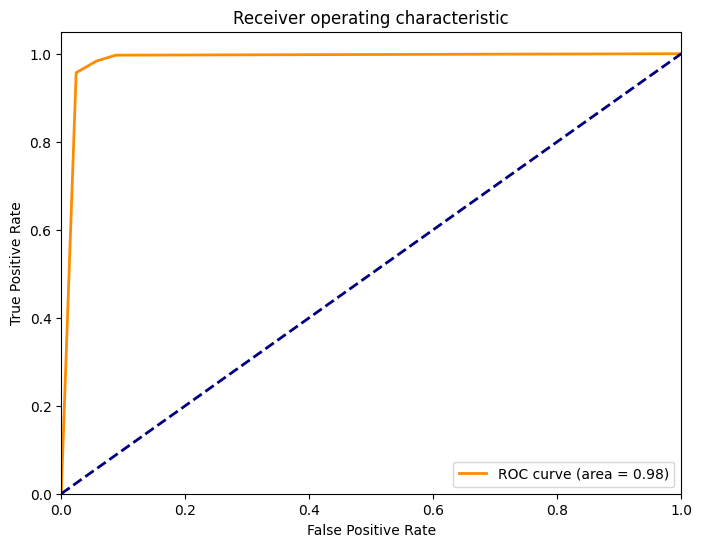

In [19]:
# Create K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, knn_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, knn_pred))
plot_roc_curve(Y_test, knn.predict_proba(X_test)[::,1])

C:\Users\didif\AppData\Local\Temp\ipykernel_17496\2594373666.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, Y_train)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3041
         1.0       0.99      0.99      0.99      3035

    accuracy                           0.99      6076
   macro avg       0.99      0.99      0.99      6076
weighted avg       0.99      0.99      0.99      6076

Confusion matrix:
 [[3021   20]
 [  16 3019]]


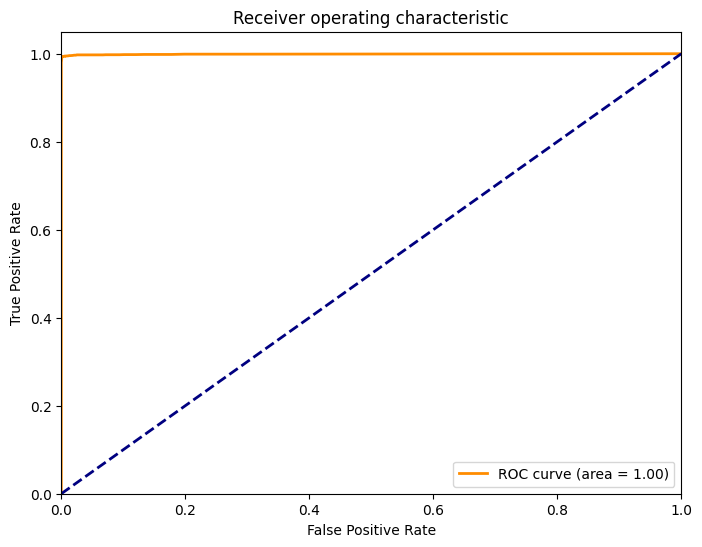

In [20]:
#Create Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced',verbose=1)
rfc.fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, rfc_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, rfc_pred))
plot_roc_curve(Y_test, rfc.predict_proba(X_test)[::,1])

Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      3041
         1.0       1.00      0.99      1.00      3035

    accuracy                           1.00      6076
   macro avg       1.00      1.00      1.00      6076
weighted avg       1.00      1.00      1.00      6076

Confusion matrix:
 [[3033    8]
 [  16 3019]]


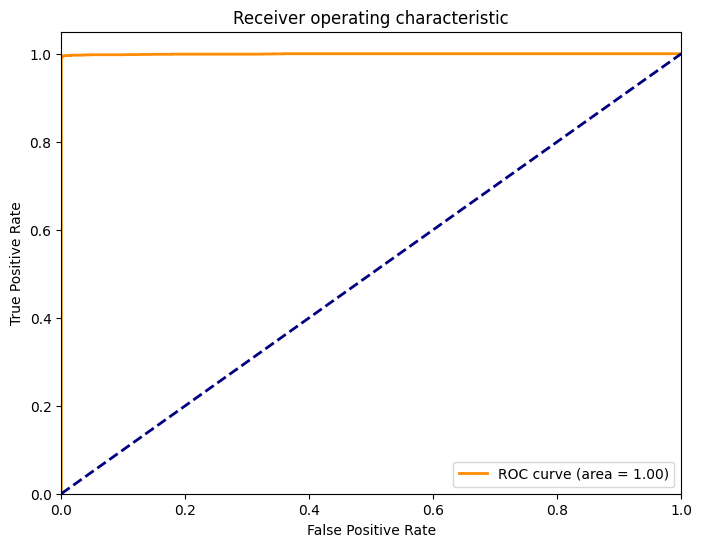

In [21]:
#Create XGBoost Classifier
xgb = XGBClassifier(n_estimators=100, random_state=42, verbosity=1)
xgb.fit(X_train, Y_train)
xgb_pred = xgb.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, xgb_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, xgb_pred))
plot_roc_curve(Y_test, xgb.predict_proba(X_test)[::,1])


In [22]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,19.0,1465816.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,2.0,98177.0,130.0,47.0,1110.0,2197.0,0.0,174655.0,-2156.0,0.0,0.0,0.0,-2178.0,0.0
2,1.0,19.0,2052922.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,15.0,201906.0,130.0,47.0,144559.0,4447.0,0.0,206512.0,210149.0,144559.0,-144559.0,0.0,2548.0,144559.0
4,1.0,12.0,7450.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
len(test)


1845

In [24]:
#Use classifier to test the test data
xgb_pred_test = xgb.predict(test)
knn_pred_test = knn.predict(test)
rfc_pred_test = rfc.predict(test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [25]:
#Create a dataframe with the results
results = pd.DataFrame({'XGB':xgb_pred_test, 'KNN':knn_pred_test, 'RFC':rfc_pred_test})
results.head()



,XGB,KNN,RFC
0,0,0.0,0.0
1,0,0.0,0.0
2,0,0.0,0.0
3,0,0.0,0.0
4,0,0.0,0.0


In [26]:
results['XGB'].value_counts()

0    1831
1      14
Name: XGB, dtype: int64

In [27]:
results['KNN'].value_counts()

0.0    1555
1.0     290
Name: KNN, dtype: int64

In [28]:
results['RFC'].value_counts()

0.0    1817
1.0      28
Name: RFC, dtype: int64

In [29]:
#Predict probablity of fraud using models
xgb_pred_test_prob = xgb.predict_proba(test)
knn_pred_test_prob = knn.predict_proba(test)
rfc_pred_test_prob = rfc.predict_proba(test)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [30]:
#print the probablity of fraud
print(xgb_pred_test_prob)
print(knn_pred_test_prob)
print(rfc_pred_test_prob)

[[9.9658191e-01 3.4181105e-03]
 [9.6624148e-01 3.3758547e-02]
 [9.9827623e-01 1.7237704e-03]
 ...
 [9.9974549e-01 2.5452886e-04]
 [9.0812767e-01 9.1872342e-02]
 [9.7652876e-01 2.3471214e-02]]
[[1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 ...
 [1.         0.        ]
 [0.66666667 0.33333333]
 [0.         1.        ]]
[[0.87 0.13]
 [0.99 0.01]
 [0.87 0.13]
 ...
 [0.98 0.02]
 [0.66 0.34]
 [0.95 0.05]]


In [31]:
#Create dataframe with probablity of fraud from xgb
xgb_pred_test_prob = pd.DataFrame(xgb_pred_test_prob)
xgb_pred_test_prob.head()

,0,1
0,0.996582,0.003418
1,0.966241,0.033759
2,0.998276,0.001724
3,0.999814,0.000186
4,0.995975,0.004025


In [32]:
#Create dataframe with probablity of fraud from knn
knn_pred_test_prob = pd.DataFrame(knn_pred_test_prob)
knn_pred_test_prob.head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [33]:
#Create dataframe with probablity of fraud from rfc
rfc_pred_test_prob = pd.DataFrame(rfc_pred_test_prob)
rfc_pred_test_prob.head()

,0,1
0,0.87,0.13
1,0.99,0.01
2,0.87,0.13
3,1.00,0.00
4,0.92,0.08


In [34]:
bTrain = pd.read_pickle("train_data.pkl")
bTest = pd.read_pickle("test_data.pkl")

In [35]:
bTrain.head()

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,date,sar_flag
1845,171142,a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bf...,3,12.0,241719.0,3,0,0.0
1846,171152,7e42b5dca9b28ee8e5545beb834361e90e6197d176b389...,3,13.0,599497.0,6,0,0.0
1847,171177,a6cdf6302aead77112013168c6d546d2df3bcb551956d2...,1,19.0,51160.0,4,0,0.0
1848,171178,1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...,3,9.0,3634343.0,6,0,0.0
1849,171180,67f8cbb64dd3d447e992b1b299e0ceed3372188e47c88e...,1,17.0,4076287.0,4,0,0.0


In [36]:
bTest.head()

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,date,sar_flag
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7,365,NaN
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,2,365,NaN
2,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,7,365,NaN
3,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,5,365,NaN
4,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,5,365,NaN


In [37]:
len(bTrain)


23790

In [38]:
len(bTest)

1845

In [45]:
import math

In [180]:
xgb_pred_test_prob[1]

0       0.003418
1       0.033759
2       0.001724
3       0.000186
4       0.004025
          ...   
1840    0.004039
1841    0.000072
1842    0.000255
1843    0.091872
1844    0.023471
Name: 1, Length: 1845, dtype: float32

In [359]:
#Create a dataframe with bTest alert_key column and xgb_pred_test_prob 1 column
my_submission = pd.DataFrame({'alert_key':bTest['alert_key'], 'sar_flag':(round(xgb_pred_test_prob[1])).apply(int)})
my_submission['alert_key'] = my_submission['alert_key'].astype(int)
my_submission=my_submission.sort_values(by='alert_key', ascending=False)
my_submission

,alert_key,sar_flag
1844,365073,0
1843,365009,0
1842,365008,0
1841,365004,0
1840,365001,0
...,...,...
4,352282,0
3,352280,0
2,352254,0
1,352253,0


In [360]:
#convert the dataframe to csv
my_submission.to_csv('submission.csv', index=False)

# Public data disclosed:

In [361]:
#Public data will be used to compare the performance of our current models to work for the private data
y_public = pd.read_csv('public_y_answer.csv')
y_public.to_pickle("y_public.pkl") 
y_public = pd.read_pickle('y_public.pkl')
y_public['alert_key'] = y_public['alert_key'].astype(int)
y_public=y_public.sort_values(by='alert_key', ascending=False)

In [362]:
y_public

,alert_key,sar_flag
1764,365073,0
1750,365009,0
1767,365008,0
1747,365004,0
1745,365001,0
...,...,...
42,352282,0
32,352280,0
53,352254,0
31,352253,0


Classification report for classifier :               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1834
           1       0.00      0.00      0.00        11

    accuracy                           0.99      1845
   macro avg       0.50      0.50      0.50      1845
weighted avg       0.99      0.99      0.99      1845

Confusion matrix:
 [[1820   14]
 [  11    0]]


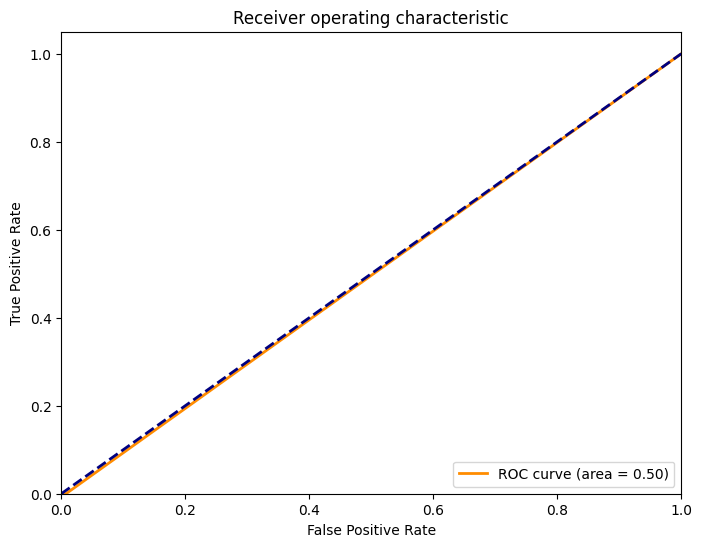

In [364]:
print("Classification report for classifier :", classification_report(y_public['sar_flag'], my_submission['sar_flag']))
print("Confusion matrix:\n" , confusion_matrix(y_public['sar_flag'], my_submission['sar_flag']))
plot_roc_curve(y_public['sar_flag'], my_submission['sar_flag'])

In [205]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Trying NN model with incomplete raw data oversampled (15 features)

In [219]:
model = Sequential()
model.add(Dense(12, input_shape=(15,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [220]:
import numpy as np

In [221]:
Y_train

,0
26922,1.0
10993,0.0
28928,1.0
24577,1.0
13170,0.0
...,...
29802,1.0
5390,0.0
860,0.0
15795,1.0


In [300]:
X_res

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,3.000000,12.000000,2.417190e+05,130.0,47.0,1990.000000,1.256500e+04,0.000000,1.507440e+05,8.274800e+04,0.0,0.0,12477.000000,1.247700e+04,0.0
1,3.000000,13.000000,5.994970e+05,130.0,47.0,1349.000000,3.581000e+03,0.000000,3.247830e+05,6.436300e+04,0.0,0.0,0.000000,4.981000e+03,0.0
2,3.000000,9.000000,3.634343e+06,130.0,47.0,51583.000000,8.293640e+05,0.000000,7.666339e+06,2.343836e+06,0.0,0.0,781279.000000,7.812790e+05,0.0
3,1.000000,17.000000,4.076287e+06,130.0,47.0,410.000000,6.360000e+02,0.000000,2.561340e+05,3.538000e+03,0.0,0.0,0.000000,3.410000e+03,0.0
4,3.000000,17.000000,1.827055e+06,130.0,47.0,0.000000,0.000000e+00,0.000000,3.087710e+05,0.000000e+00,0.0,0.0,0.000000,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30373,1.000000,7.224837,9.633909e+04,130.0,47.0,220.030046,0.000000e+00,0.000000,6.647777e+04,0.000000e+00,0.0,0.0,0.000000,0.000000e+00,0.0
30374,1.000000,13.244631,9.633707e+05,130.0,47.0,8646.454125,0.000000e+00,126.146706,1.832605e+05,9.541198e+03,0.0,0.0,0.000000,9.126114e+03,0.0
30375,1.000000,17.319588,2.072985e+05,130.0,47.0,83724.593860,0.000000e+00,0.000000,1.103574e+05,-3.360824e+00,0.0,0.0,0.000000,0.000000e+00,0.0
30376,1.000000,17.506843,4.900595e+05,130.0,47.0,126.479712,5.753316e+04,0.000000,6.853208e+04,4.501000e+04,0.0,0.0,238.688118,1.936877e+04,0.0


In [252]:
Y_res

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
30373,1.0
30374,1.0
30375,1.0
30376,1.0


In [225]:
h = model.fit(
    X_res, Y_res,
    epochs=50
)

Epoch 1/50
950/950 [==============================] - 2s 3ms/step - loss: 252.0534 - accuracy: 0.5995
Epoch 2/50
950/950 [==============================] - 2s 3ms/step - loss: 213.6406 - accuracy: 0.6038
Epoch 3/50
950/950 [==============================] - 2s 2ms/step - loss: 223.3920 - accuracy: 0.6093
Epoch 4/50
950/950 [==============================] - 2s 3ms/step - loss: 212.1278 - accuracy: 0.6017
Epoch 5/50
950/950 [==============================] - 2s 2ms/step - loss: 175.4476 - accuracy: 0.6147
Epoch 6/50
950/950 [==============================] - 2s 3ms/step - loss: 155.2585 - accuracy: 0.6187
Epoch 7/50
950/950 [==============================] - 2s 2ms/step - loss: 124.4877 - accuracy: 0.6199
Epoch 8/50
950/950 [==============================] - 2s 2ms/step - loss: 108.4351 - accuracy: 0.6232
Epoch 9/50
950/950 [==============================] - 2s 3ms/step - loss: 94.2126 - accuracy: 0.6236
Epoch 10/50
950/950 [==============================] - 2s 2ms/step - loss: 74.6439 

In [226]:
preds = model.predict(test)

58/58 [==============================] - 0s 2ms/step


In [227]:
preds = pd.DataFrame(preds)
preds

,0
0,0.476373
1,0.582403
2,0.476373
3,0.000000
4,0.476373
...,...
1840,0.582403
1841,0.476373
1842,0.476373
1843,0.476373


In [228]:
my_submission = pd.DataFrame({'alert_key':bTest['alert_key'], 'sar_flag':(round(preds[0])).apply(int)})
my_submission['alert_key'] = my_submission['alert_key'].astype(int)
my_submission=my_submission.sort_values(by='alert_key', ascending=False)
my_submission

,alert_key,sar_flag
1844,365073,0
1843,365009,0
1842,365008,0
1841,365004,0
1840,365001,1
...,...,...
4,352282,0
3,352280,0
2,352254,0
1,352253,1


# Results for 15 features oversampled

Classification report for classifier :               precision    recall  f1-score   support

           0       0.99      0.71      0.83      1834
           1       0.01      0.27      0.01        11

    accuracy                           0.71      1845
   macro avg       0.50      0.49      0.42      1845
weighted avg       0.99      0.71      0.83      1845

Confusion matrix:
 [[1307  527]
 [   8    3]]


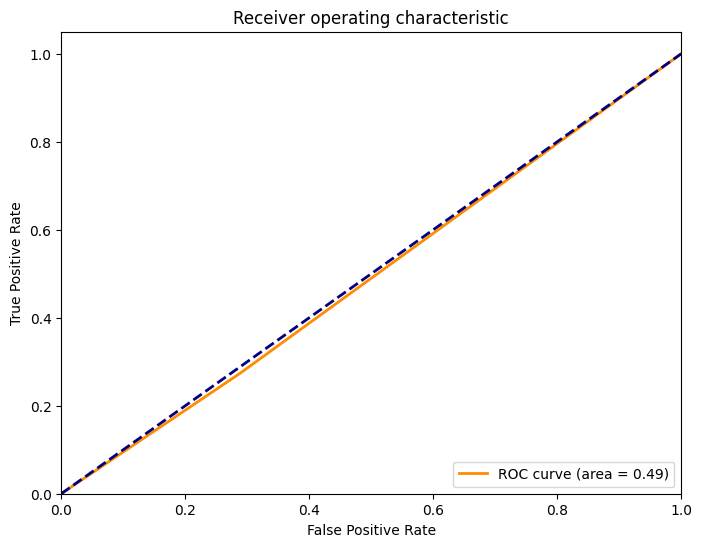

In [229]:
print("Classification report for classifier :", classification_report(y_public['sar_flag'], my_submission['sar_flag']))
print("Confusion matrix:\n" , confusion_matrix(y_public['sar_flag'], my_submission['sar_flag']))
plot_roc_curve(y_public['sar_flag'], preds[0])

# Trying NN model with 32 features, NaN items preprocessed to median values

In [337]:
test = pd.read_pickle("test_datats.pkl")
train = pd.read_pickle("train_datats.pkl")

In [338]:
test
del test["sar_flag"]
del test['cust_id']

In [339]:
train

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,date_x,sar_flag,date_y,country,...,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM,trans_date,trans_no,trade_amount_usd
30084,171142,a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bf...,3,12.0,241719.0,3,0,0.0,25.0,130.0,...,122.0,1.0,1.0,4.0,137.0,0.0,1.0,82.0,0.0,18359.0
30085,171152,7e42b5dca9b28ee8e5545beb834361e90e6197d176b389...,3,13.0,599497.0,6,0,0.0,10.0,130.0,...,43628.0,1.0,12.0,4.0,137.0,0.0,0.0,82.0,0.0,18359.0
30086,171177,a6cdf6302aead77112013168c6d546d2df3bcb551956d2...,1,19.0,51160.0,4,0,0.0,3.0,130.0,...,1651.0,1.0,13.0,21.0,29.0,0.0,1.0,82.0,0.0,18359.0
30087,171178,1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...,3,9.0,3634343.0,6,0,0.0,55.0,130.0,...,287.0,1.0,4.0,4.0,137.0,0.0,1.0,82.0,0.0,18359.0
30088,171180,67f8cbb64dd3d447e992b1b299e0ceed3372188e47c88e...,1,17.0,4076287.0,4,0,0.0,2.0,130.0,...,468022.0,1.0,16.0,4.0,137.0,0.0,0.0,82.0,0.0,18359.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403376,352123,b600c0720096c241f5aec16b096c6a353492eee8a5855a...,1,17.0,12207.0,2,364,0.0,2.0,130.0,...,203352.0,1.0,2.0,4.0,137.0,0.0,1.0,82.0,0.0,18359.0
403377,352124,06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...,1,17.0,259985.0,4,364,0.0,0.0,130.0,...,109016.0,1.0,16.0,4.0,137.0,0.0,0.0,82.0,0.0,18359.0
403378,352125,0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...,3,19.0,928963.0,3,364,0.0,3.0,130.0,...,6900402.0,1.0,6.0,4.0,137.0,0.0,0.0,76.0,4.0,22127.0
403379,352128,ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...,3,19.0,21647.0,4,364,0.0,3.0,130.0,...,11365.0,1.0,13.0,4.0,147.0,1.0,1.0,82.0,0.0,18359.0


In [340]:
Y_train_new=pd.DataFrame(train['sar_flag'])
del train["sar_flag"]
del train['cust_id']
del train['debit_credit']
X_train_new=train

In [341]:
X_train_new

,alert_key,risk_rank,occupation_code,total_asset,AGE,date_x,date_y,country,cur_type,amt,...,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM,trans_date,trans_no,trade_amount_usd
30084,171142,3,12.0,241719.0,3,0,25.0,130.0,47.0,1990.0,...,122.0,1.0,1.0,4.0,137.0,0.0,1.0,82.0,0.0,18359.0
30085,171152,3,13.0,599497.0,6,0,10.0,130.0,47.0,1349.0,...,43628.0,1.0,12.0,4.0,137.0,0.0,0.0,82.0,0.0,18359.0
30086,171177,1,19.0,51160.0,4,0,3.0,130.0,47.0,909.0,...,1651.0,1.0,13.0,21.0,29.0,0.0,1.0,82.0,0.0,18359.0
30087,171178,3,9.0,3634343.0,6,0,55.0,130.0,47.0,51583.0,...,287.0,1.0,4.0,4.0,137.0,0.0,1.0,82.0,0.0,18359.0
30088,171180,1,17.0,4076287.0,4,0,2.0,130.0,47.0,410.0,...,468022.0,1.0,16.0,4.0,137.0,0.0,0.0,82.0,0.0,18359.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403376,352123,1,17.0,12207.0,2,364,2.0,130.0,47.0,2601.0,...,203352.0,1.0,2.0,4.0,137.0,0.0,1.0,82.0,0.0,18359.0
403377,352124,1,17.0,259985.0,4,364,0.0,130.0,47.0,122.0,...,109016.0,1.0,16.0,4.0,137.0,0.0,0.0,82.0,0.0,18359.0
403378,352125,3,19.0,928963.0,3,364,3.0,130.0,47.0,909.0,...,6900402.0,1.0,6.0,4.0,137.0,0.0,0.0,76.0,4.0,22127.0
403379,352128,3,19.0,21647.0,4,364,3.0,130.0,47.0,909.0,...,11365.0,1.0,13.0,4.0,147.0,1.0,1.0,82.0,0.0,18359.0


In [342]:
Y_train_new

,sar_flag
30084,0.0
30085,0.0
30086,0.0
30087,0.0
30088,0.0
...,...
403376,0.0
403377,0.0
403378,0.0
403379,0.0


In [324]:
model = Sequential()
model.add(Dense(12, input_shape=(32,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [326]:
n = model.fit(
    X_train_new.to_numpy(), Y_train_new.to_numpy(),
    epochs=50
)

Epoch 1/50
748/748 [==============================] - 2s 3ms/step - loss: 42.3259 - accuracy: 0.9828
Epoch 2/50
748/748 [==============================] - 2s 3ms/step - loss: 38.3858 - accuracy: 0.9812
Epoch 3/50
748/748 [==============================] - 2s 3ms/step - loss: 36.6130 - accuracy: 0.9814
Epoch 4/50
748/748 [==============================] - 2s 3ms/step - loss: 20.2225 - accuracy: 0.9713
Epoch 5/50
748/748 [==============================] - 2s 3ms/step - loss: 26.9317 - accuracy: 0.9752
Epoch 6/50
748/748 [==============================] - 2s 3ms/step - loss: 19.8220 - accuracy: 0.9847
Epoch 7/50
748/748 [==============================] - 2s 3ms/step - loss: 12.6212 - accuracy: 0.9872
Epoch 8/50
748/748 [==============================] - 2s 3ms/step - loss: 10.7576 - accuracy: 0.9871
Epoch 9/50
748/748 [==============================] - 2s 3ms/step - loss: 6.5058 - accuracy: 0.9882
Epoch 10/50
748/748 [==============================] - 2s 3ms/step - loss: 12.4201 - accurac

In [329]:
preds = model.predict(test)

58/58 [==============================] - 0s 2ms/step


In [330]:
preds = pd.DataFrame(preds)
preds

,0
0,0.00943
1,0.00943
2,0.00943
3,0.00943
4,0.00943
...,...
1840,0.00943
1841,0.00943
1842,0.00943
1843,0.00943


In [331]:
my_submission = pd.DataFrame({'alert_key':bTest['alert_key'], 'sar_flag':(round(preds[0])).apply(int)})
my_submission['alert_key'] = my_submission['alert_key'].astype(int)
my_submission=my_submission.sort_values(by='alert_key', ascending=False)
my_submission

,alert_key,sar_flag
1844,365073,0
1843,365009,0
1842,365008,0
1841,365004,0
1840,365001,0
...,...,...
4,352282,0
3,352280,0
2,352254,0
1,352253,0


# Results with 32 features NaN preprocessed

Classification report for classifier :               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1834
           1       0.00      0.00      0.00        11

    accuracy                           0.99      1845
   macro avg       0.50      0.50      0.50      1845
weighted avg       0.99      0.99      0.99      1845

Confusion matrix:
 [[1833    1]
 [  11    0]]


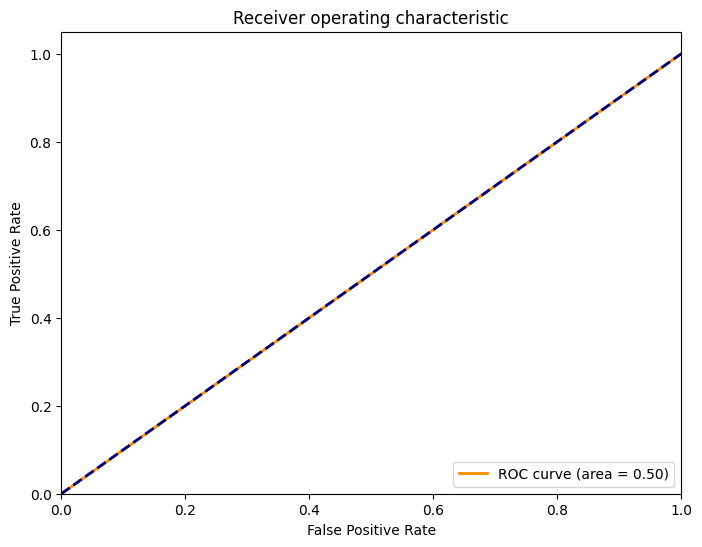

In [332]:
print("Classification report for classifier :", classification_report(y_public['sar_flag'], my_submission['sar_flag']))
print("Confusion matrix:\n" , confusion_matrix(y_public['sar_flag'], my_submission['sar_flag']))
plot_roc_curve(y_public['sar_flag'], my_submission['sar_flag'])

In [343]:
Y_train_new.value_counts()

sar_flag
0.0         23672
1.0           234
dtype: int64

# Trying NN model with 32 features NaN preprocessed and oversampled

In [345]:
#Oversample the data
sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_resample(X_train_new.to_numpy(), Y_train_new.to_numpy())

#Turn the oversampled data into a dataframe
Y_res = pd.DataFrame(Y_res)
X_res = pd.DataFrame(X_res)
#Check the value counts
Y_res[0].value_counts()

0.0    23672
1.0    23672
Name: 0, dtype: int64

In [348]:
model = Sequential()
model.add(Dense(12, input_shape=(32,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [350]:
z = model.fit(
    X_res.to_numpy(), Y_res.to_numpy(),
    epochs=50
)

Epoch 1/50
1480/1480 [==============================] - 3s 2ms/step - loss: 842.6753 - accuracy: 0.5869
Epoch 2/50
1480/1480 [==============================] - 3s 2ms/step - loss: 618.7162 - accuracy: 0.5918
Epoch 3/50
1480/1480 [==============================] - 3s 2ms/step - loss: 429.5747 - accuracy: 0.5953
Epoch 4/50
1480/1480 [==============================] - 3s 2ms/step - loss: 312.5103 - accuracy: 0.5826
Epoch 5/50
1480/1480 [==============================] - 3s 2ms/step - loss: 234.9525 - accuracy: 0.5741
Epoch 6/50
1480/1480 [==============================] - 3s 2ms/step - loss: 132.7995 - accuracy: 0.5555
Epoch 7/50
1480/1480 [==============================] - 3s 2ms/step - loss: 86.0248 - accuracy: 0.5551
Epoch 8/50
1480/1480 [==============================] - 3s 2ms/step - loss: 39.8235 - accuracy: 0.5514
Epoch 9/50
1480/1480 [==============================] - 3s 2ms/step - loss: 5.2465 - accuracy: 0.5260
Epoch 10/50
1480/1480 [==============================] - 3s 2ms/step

In [353]:
preds = model.predict(test)

58/58 [==============================] - 0s 2ms/step


In [354]:
preds = pd.DataFrame(preds)
preds

,0
0,0.506924
1,0.506924
2,0.506924
3,0.506924
4,0.506924
...,...
1840,0.506924
1841,0.506924
1842,0.506924
1843,0.506924


In [355]:
my_submission = pd.DataFrame({'alert_key':bTest['alert_key'], 'sar_flag':(round(preds[0])).apply(int)})
my_submission['alert_key'] = my_submission['alert_key'].astype(int)
my_submission=my_submission.sort_values(by='alert_key', ascending=False)
my_submission

,alert_key,sar_flag
1844,365073,1
1843,365009,1
1842,365008,1
1841,365004,1
1840,365001,1
...,...,...
4,352282,1
3,352280,1
2,352254,1
1,352253,1


# Results 32 features NaN preprocessed and oversampled

Classification report for classifier :               precision    recall  f1-score   support

           0       1.00      0.00      0.01      1834
           1       0.01      1.00      0.01        11

    accuracy                           0.01      1845
   macro avg       0.50      0.50      0.01      1845
weighted avg       0.99      0.01      0.01      1845

Confusion matrix:
 [[   6 1828]
 [   0   11]]


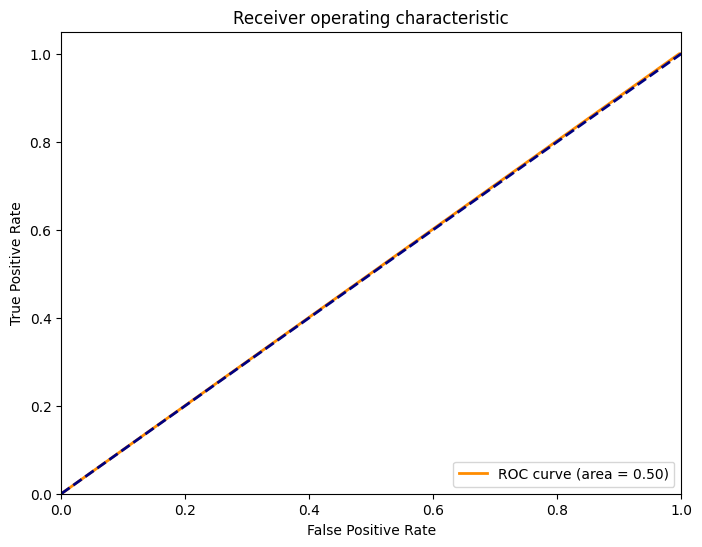

In [356]:
print("Classification report for classifier :", classification_report(y_public['sar_flag'], my_submission['sar_flag']))
print("Confusion matrix:\n" , confusion_matrix(y_public['sar_flag'], my_submission['sar_flag']))
plot_roc_curve(y_public['sar_flag'], my_submission['sar_flag'])